importing libraries

In [1]:
#for handling emoticons
!pip install emoji

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=f82fe8469b223157e32443465948dcf108cb14903f5be282d024fcdf1796c0c1
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [2]:
pip install num2words

     |████████████████████████████████| 102kB 2.7MB/s 


In [3]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 3.4MB/s 


In [122]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.3MB/s 
     |████████████████████████████████| 552kB 21.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=4a63acf21113fca6d04c81b8ad1cc008cca35189b3177aa16498c90c7a24bebe
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=1fc6c5476c11fd5d5542e39f019dc281dfe5ecaf6a5629dc5378cc98761970cc
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import json
import csv
from collections import defaultdict
from collections import Counter
import numpy as np
import re
from num2words import num2words
import nltk
import pandas as pd

#for topic modelling
import gensim
from gensim import models
from gensim import corpora
from gensim.models import CoherenceModel

#for plotting
import seaborn as sns
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim  
%matplotlib inline

#for handling emoticons
import emoji

#for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

**Loading data**

In [0]:
with open('/content/drive/My Drive/Yuvi_RIP.json') as tweets:
  tweet_data = json.load(tweets)

*Storing it as dataframe*

In [0]:
tweet_data_frame = pd.DataFrame.from_dict(tweet_data)

In [7]:
tweet_data_frame.shape

(9189, 27)

In [8]:
tweet_data_frame.columns

Index(['_id', 'created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang'],
      dtype='object')

In [9]:
tweet_data_frame.head()

,_id,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,{'$oid': '5ee1244dc51e2d8beb570717'},Wed Jun 10 18:19:05 +0000 2020,1270782555357212700,1270782555357212672,RT @PTTVOnlineNews: திமுக எம்எல்ஏ ஜெ.அன்பழகன் ...,False,"[0, 140]","{'hashtags': [{'text': 'JAnbazhagan', 'indices...","{'iso_language_code': 'ta', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1146440916527243300, 'id_str': '1146440...",None,None,None,None,{'created_at': 'Wed Jun 10 06:32:16 +0000 2020...,False,90,0,False,False,ta
1,{'$oid': '5ee1244dc51e2d8beb570718'},Wed Jun 10 18:18:55 +0000 2020,1270782513577963500,1270782513577963525,RT @ShikharDhawan85: @WasimJaffer14 @virenders...,False,"[0, 107]","{'hashtags': [{'text': 'TeamIndia', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 2939301529, 'id_str': '2939301529', 'na...",None,None,None,None,{'created_at': 'Wed Jun 10 12:10:56 +0000 2020...,False,1,0,False,False,en
2,{'$oid': '5ee1244dc51e2d8beb570719'},Wed Jun 10 18:18:43 +0000 2020,1270782461304164400,1270782461304164352,"RT @TheCricketWire: #OnThisDay last year, Yuvr...",False,"[0, 140]","{'hashtags': [{'text': 'OnThisDay', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1256605147355988000, 'id_str': '1256605...",None,None,None,None,{'created_at': 'Wed Jun 10 10:26:06 +0000 2020...,False,36,0,False,False,en
3,{'$oid': '5ee1244dc51e2d8beb57071a'},Wed Jun 10 18:18:41 +0000 2020,1270782454454837200,1270782454454837248,RT @Sra1karne: We are at 5th place in Trending...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 464766558, 'id_str': '464766558', 'name...",None,None,None,None,{'created_at': 'Wed Jun 10 06:25:26 +0000 2020...,False,4,0,False,False,en
4,{'$oid': '5ee1244dc51e2d8beb57071b'},Wed Jun 10 18:18:34 +0000 2020,1270782423538647000,1270782423538647040,RT @fadnavis_amruta: He was out on streets of ...,False,"[0, 144]","{'hashtags': [{'text': 'Dharavi', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1850478770, 'id_str': '1850478770', 'na...",None,None,None,None,{'created_at': 'Wed Jun 10 08:00:34 +0000 2020...,False,269,0,False,False,en


**Separating the tweets into different classes**

In [0]:
df_A = pd.DataFrame()                       #dataframe that stores tweets of class A
df_B = pd.DataFrame()                       #dataframe that stores tweets of class B
df_C = pd.DataFrame()                       #dataframe that stores tweets of class C


for i in range(len(tweet_data_frame)):
  text = tweet_data_frame.loc[i,'full_text']

  if("#MissYouYuvi" in text and "#RestInPeace" not in text):
    df_A = df_A.append(tweet_data_frame.loc[[i]])
  elif("#RestInPeace" in text and "#MissYouYuvi" not in text):
    df_B = df_B.append(tweet_data_frame.loc[[i]])
  elif("#RestInPeace" in text and "#MissYouYuvi" in text):
    df_C = df_C.append(tweet_data_frame.loc[[i]])

####**Analysing the data fetched**

In [0]:
print("Size of class A = ",len(df_A.index))
print("Size of class B = ",len(df_B.index))
print("Size of class C = ",len(df_C.index))

Size of class A =  5665
Size of class B =  416
Size of class C =  269


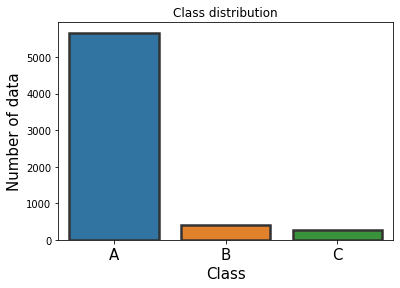

In [0]:
class_name = ['A','B','C']
count = [len(df_A.index),len(df_B.index),len(df_C.index)]

index = np.arange(len(class_name))

sns.barplot(x=class_name, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Class distribution')
plt.show()

**Number of users in each class**

*Class A*

In [0]:
users_A = []

for i in df_A.index:
  users_A.append(df_A.loc[i,'user']['id_str'])

In [278]:
print("Tweets for class A: ", len(users_A))
print("Number of users tweeting for class A :", len(set(users_A)))

Tweets for class A:  5665
Number of users tweeting for class A : 1617


*Class B*

In [0]:
users_B = []

for i in df_B.index:
  users_B.append(df_B.loc[i,'user']['id_str'])

In [0]:
print("Tweets for class B: ", len(users_B))
print("Number of users tweeting for class B :", len(set(users_B)))

Tweets for class B:  416
Number of users tweeting for class B : 381


*Class C*

In [0]:
users_C = []

for i in df_C.index:
  users_C.append(df_C.loc[i,'user']['id_str'])

In [0]:
print("Tweets for class C: ", len(users_C))
print("Number of users tweeting for class C :", len(set(users_C)))

Tweets for class C:  269
Number of users tweeting for class C : 197


**Number of verified users in each class**

In [0]:
count_A = 0

for i in df_A.index:
  if(df_A.loc[i,'user']['verified'] == True):
    count_A +=1

print("Number of verified users in class A = ", count_A)
print("Number of non-verified users in class A = ",len(set(users_A))-count_A)

Number of verified users in class A =  34
Number of non-verified users in class A =  1583


*Class B*

In [0]:
count_B = 0

for i in df_B.index:
  if(df_B.loc[i,'user']['verified'] == True):
    count_B +=1

print("Number of verified users in class B = ", count_B)
print("Number of non-verified users in class B = ",len(set(users_B))-count_B)

Number of verified users in class B =  6
Number of non-verified users in class B =  375


*Class C*

In [0]:
count_C = 0

for i in df_C.index:
  if(df_C.loc[i,'user']['verified'] == True):
    count_C +=1

print("Number of verified users in class C = ", count_C)
print("Number of non-verified users in class C = ",len(set(users_C))-count_C)

Number of verified users in class C =  0
Number of non-verified users in class C =  197


**Number of hashtags vs timeline**

In [0]:
time_A = defaultdict(lambda:0)

for i in df_A.index:
  date_time = df_A.loc[i,'created_at']
  time = date_time.split('Wed Jun 10')[1].strip()
  hour = time.split(":")[0]
  time_A[hour] +=1

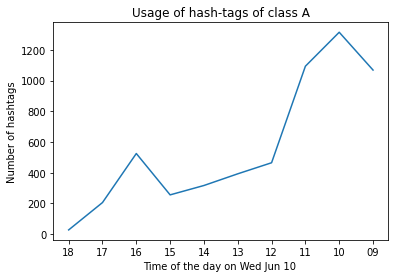

In [281]:
plt.plot(list(time_A.keys()), list(time_A.values()))
plt.xlabel('Time of the day on Wed Jun 10 ') 
plt.ylabel('Number of hashtags')
plt.title("Usage of hash-tags of class A")
plt.show()

In [0]:
time_B = defaultdict(lambda:0)

for i in df_B.index:
  date_time = df_B.loc[i,'created_at']
  time = date_time.split('Wed Jun 10')[1].strip()
  hour = time.split(":")[0]
  time_B[hour] +=1

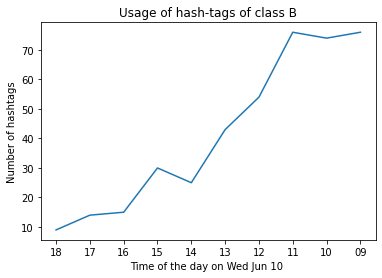

In [283]:
plt.plot(list(time_B.keys()), list(time_B.values()))
plt.xlabel('Time of the day on Wed Jun 10 ') 
plt.ylabel('Number of hashtags')
plt.title("Usage of hash-tags of class B")
plt.show()

In [0]:
time_C = defaultdict(lambda:0)

for i in df_C.index:
  date_time = df_C.loc[i,'created_at']
  time = date_time.split('Wed Jun 10')[1].strip()
  hour = time.split(":")[0]
  time_C[hour] +=1

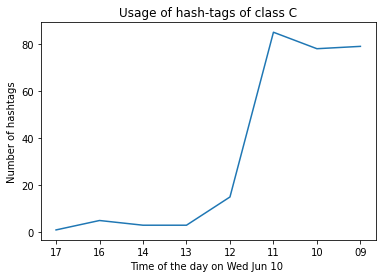

In [285]:
plt.plot(list(time_C.keys()), list(time_C.values()))
plt.xlabel('Time of the day on Wed Jun 10 ') 
plt.ylabel('Number of hashtags')
plt.title("Usage of hash-tags of class C")
plt.show()

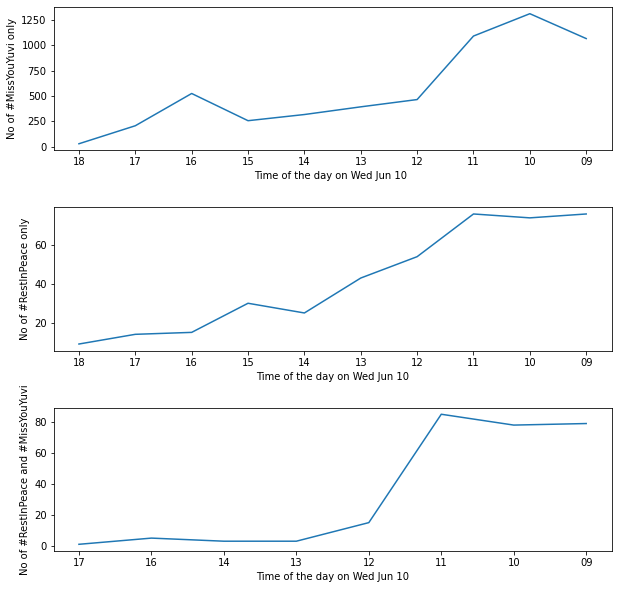

In [299]:
f, axs = plt.subplots(3,2,figsize=(10,10))

plt.subplot(311)
plt.plot(list(time_A.keys()), list(time_A.values()))
plt.ylabel("No of #MissYouYuvi only")
plt.xlabel("Time of the day on Wed Jun 10 ")

plt.subplot(312)
plt.plot(list(time_B.keys()), list(time_B.values()))
plt.ylabel("No of #RestInPeace only")
plt.xlabel("Time of the day on Wed Jun 10")

plt.subplot(313)
plt.plot(list(time_C.keys()), list(time_C.values()))
plt.ylabel("No of #RestInPeace and #MissYouYuvi")
plt.xlabel("Time of the day on Wed Jun 10")

f.subplots_adjust(hspace=0.4)
plt.show()

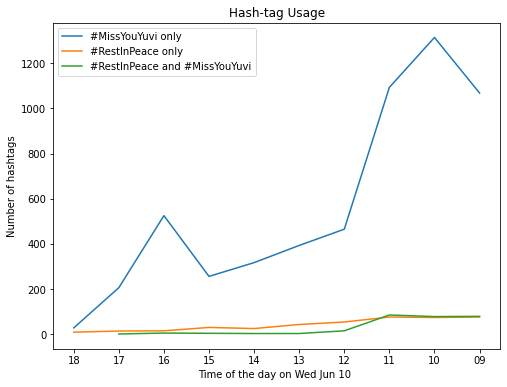

In [301]:
plt.figure(figsize=(8,6))

plt.plot(list(time_A.keys()), list(time_A.values()), label = "#MissYouYuvi only")  
plt.plot(list(time_B.keys()), list(time_B.values()), label = "#RestInPeace only")  
plt.plot(list(time_C.keys()), list(time_C.values()), label = "#RestInPeace and #MissYouYuvi")  
  
plt.xlabel('Time of the day on Wed Jun 10 ') 

plt.ylabel('Number of hashtags') 

plt.title('Hash-tag Usage')
plt.legend()
plt.show() 

####**Preparing the data for processing**

**Data pre-processing**

In [0]:
def remove_hashtag(sent):
  sent = re.sub(r'(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)','',sent)
  return sent

In [0]:
def remove_links(text):
  text = re.sub(r'(\w+:\/\/\S+)','',text)
  
  return text

In [0]:
def remove_specialChars(text):
  text = (re.sub(r'[\.•,;:?!#=+$%^&*_~><\-\(\)\{\}\[\]\"\'\|\/]','',text)).replace('RT','')
  
  # changing to lower case
  text = text.lower()
  return text

In [0]:
def replace_emoji(text):
  text = emoji.demojize(text)
  text = text.replace(":"," ")
  tweet = ' '.join(text.split())

  return tweet

In [0]:
def numberTowords(tweet):

  final_tweet = []

  for word in tweet:
    if(word.isnumeric()):
      final_tweet.append(num2words(word))
    else:
      final_tweet.append(word)
  
  return final_tweet

In [0]:
# function to handle negative contractions

def handle_negation(text):
  text = re.sub(r'(\w+)n\'t', '\g<1> not',text)
  return text

**Tokenise and Lemmatise**

In [16]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def tokenise(line):
  lem_words = []

  tokens = line.split()

  for j in tokens:
    lem_words.append(lm.lemmatize(j))
    
  return lem_words

**Preparing data for analysis**

In [0]:
def get_tweets(df):
  cleaned_tweets = []
  vocab = set()

  tokens_dict = defaultdict(list)                           # dictionary that stores tokens of each tweet
  wd_count = defaultdict(lambda:defaultdict(lambda:0))      # dictionary that stores count(term,tweet) i.e. tf
  w_count = defaultdict(lambda:0)                           # dictionary that stores df(term)

  for i in df.index:
    text = df.loc[i,'full_text']

    #cleaning the tweets
    h_tweet = remove_hashtag(text)
    l_tweet = remove_links(h_tweet)
    demoji = replace_emoji(l_tweet)
    n_tweet = handle_negation(demoji)
    clean_tweet = remove_specialChars(n_tweet)

    #generate tokens
    tokens = tokenise(clean_tweet)

    # final = numberTowords(tokens)
    # print(final)
    
    cleaned_tweets.append(tokens)

  return cleaned_tweets

In [0]:
tweets_A = get_tweets(df_A)

In [0]:
tweets_B = get_tweets(df_B)

In [0]:
tweets_C = get_tweets(df_C)

####**Topic Modelling using LDA**

In [0]:
def build_corpus(final_tweet):
  dictionary = corpora.Dictionary()

  BoW_corpus = [dictionary.doc2bow(sent, allow_update=True) for sent in final_tweet]
  dictionary = gensim.corpora.Dictionary(final_tweet)

  tfidf = models.TfidfModel(BoW_corpus)
  corpus_tfidf = tfidf[BoW_corpus]

  return corpus_tfidf,dictionary

In [0]:
BoW_A,dict_A = build_corpus(tweets_A)
BoW_B,dict_B = build_corpus(tweets_B)
BoW_C,dict_C = build_corpus(tweets_C)

In [0]:
def find_topics(corpus_tfidf,dictionary,num):

  lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num, id2word=dictionary, passes=2, workers=4)

  return lda_model_tfidf

In [0]:
def show_topics(model,corpus,dictionary):
  for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

**For Class A (#MissYouYuvi only)**

In [0]:
#perform topic modelling
topics = 15
model_A = find_topics(BoW_A,dict_A,topics)

In [336]:
show_topics(model_A,BoW_A,dict_A)

Topic: 0 Word: 0.021*"one" + 0.020*"emotion" + 0.018*"million" + 0.016*"man" + 0.015*"love" + 0.011*"you" + 0.011*"sir" + 0.011*"happy" + 0.010*"enjoy" + 0.010*"of"
Topic: 1 Word: 0.016*"fire" + 0.014*"heavyheartexclamation" + 0.013*"foldedhands" + 0.011*"brokenheart" + 0.011*"12" + 0.011*"you" + 0.010*"champion" + 0.009*"king" + 0.009*"the" + 0.008*"forever"
Topic: 2 Word: 0.026*"heartsuit" + 0.021*"brokenheart" + 0.016*"foldedhands" + 0.014*"legend" + 0.012*"retire" + 0.011*"never" + 0.010*"you" + 0.010*"we" + 0.008*"blueheart" + 0.008*"yuvi"
Topic: 3 Word: 0.013*"6" + 0.012*"the" + 0.009*"and" + 0.008*"i" + 0.008*"a" + 0.008*"to" + 0.007*"yuvi" + 0.007*"in" + 0.006*"six" + 0.006*"of"
Topic: 4 Word: 0.041*"collision" + 0.012*"than" + 0.012*"six" + 0.012*"more" + 0.011*"who" + 0.011*"man" + 0.010*"the" + 0.010*"just" + 0.010*"6" + 0.009*"cup"
Topic: 5 Word: 0.042*"redheart" + 0.021*"stalwart" + 0.016*"loudlycryingface" + 0.015*"rt" + 0.014*"faceblowingakiss" + 0.011*"smilingfacewithhe

In [335]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_A, BoW_A, dict_A)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.020399 -0.054994       1        1  8.263664
3     -0.098126 -0.030540       2        1  7.469869
6     -0.000118 -0.067534       3        1  7.449594
13     0.073105 -0.034944       4        1  7.412266
10    -0.070811  0.039718       5        1  7.231930
0     -0.007999  0.040917       6        1  7.231408
11    -0.005223 -0.047543       7        1  6.915408
2      0.055618 -0.042097       8        1  6.835495
4     -0.081312  0.032527       9        1  6.720596
1      0.035111  0.023853      10        1  6.129424
12    -0.006359 -0.009710      11        1  6.006473
8      0.003006  0.034365      12        1  5.826838
5      0.074151  0.100604      13        1  5.823148
14    -0.001871  0.005970      14        1  5.414513
9      0.010428  0.009409      15        1  5.269382, topic_info=          Term        Freq       Total Category  logprob  loglift
429  collision   46.000000   46.000000  Default  30.0000  30.0000
86    redheart  117.000000  117.000000  Default  29.0000  29.0000
283  heartsuit   54.000000   54.000000  Default  28.0000  28.0000
9          are   84.000000   84.000000  Default  27.0000  27.0000
231    emotion   28.000000   28.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
4          the    3.510704  106.361977  Topic15  -5.3475  -0.4678
97          we    3.417395   87.453789  Topic15  -5.3744  -0.2990
1           is    3.292140   75.925858  Topic15  -5.4117  -0.1950
83       never    3.201307   49.371956  Topic15  -5.4397   0.2074
189         up    3.171046   45.579803  Topic15  -5.4492   0.2779

[1013 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1103      1  0.587792   0f
1103      5  0.117558   0f
1103      6  0.117558   0f
1103      7  0.117558   0f
662       1  0.247093    1
...     ...       ...  ...
138      11  0.052444    …
138      12  0.078667    …
138      13  0.104889    …
138      14  0.026222    …
138      15  0.052444    …

[2971 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 7, 14, 11, 1, 12, 3, 5, 2, 13, 9, 6, 15, 10])

**For Class B (#RestInPeace only)**

In [0]:
topics = 8
model_B = find_topics(BoW_B,dict_B,topics)

In [303]:
show_topics(model_B,BoW_B,dict_B)

Topic: 0 Word: 0.007*"எம்எல்ஏ" + 0.007*"திமுக" + 0.006*"ht…" + 0.006*"சீமான்" + 0.006*"மறைவுக்கு" + 0.006*"இரங்கல்" + 0.006*"ஜெஅன்பழகன்" + 0.006*"வீரவணக்கம்" + 0.006*"campaign" + 0.006*"school"
Topic: 1 Word: 0.005*"humanity" + 0.004*"to" + 0.004*"the" + 0.004*"ஆழ்ந்தஇரங்கல்" + 0.003*"in" + 0.003*"nothing" + 0.003*"see" + 0.002*"this" + 0.002*"party" + 0.002*"come"
Topic: 2 Word: 0.006*"கேரள" + 0.006*"முதல்வர்" + 0.006*"பினராயி" + 0.006*"எமஎல்ஏ" + 0.004*"dhak" + 0.004*"grinningfacewithsweat" + 0.004*"ek" + 0.004*"விஜ…" + 0.004*"downcastfacewithsweat" + 0.003*"அண்ணனே"
Topic: 3 Word: 0.008*"foldedhands" + 0.004*"tribute" + 0.004*"special" + 0.004*"dubey" + 0.004*"inning" + 0.004*"incredible" + 0.004*"what" + 0.004*"twitter" + 0.004*"திமுக" + 0.004*"an"
Topic: 4 Word: 0.011*"ஜெஅன்பழகன்" + 0.009*"திமுக" + 0.008*"இரங்கல்" + 0.008*"புதல்வர்" + 0.008*"அவர்களுக்கு" + 0.008*"அவரது" + 0.008*"செலுத்தும்" + 0.008*"திருராஜாஅன்பழகன்" + 0.008*"மறைவுக்கு" + 0.008*"இன்று"
Topic: 5 Word: 0.008*"the" + 0

In [304]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_B, BoW_B, dict_B)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.141123 -0.027648       1        1  21.940495
4      0.029206  0.078845       2        1  13.099450
0      0.008584 -0.009386       3        1  12.693405
7     -0.050172 -0.026748       4        1  12.553276
2     -0.033444  0.004939       5        1  11.393382
5     -0.045418 -0.010121       6        1  10.530012
3     -0.008836 -0.011253       7        1   9.228663
1     -0.041042  0.001373       8        1   8.561325, topic_info=          Term       Freq      Total Category  logprob  loglift
0          ht…  15.000000  15.000000  Default  30.0000  30.0000
3       சீமான்  15.000000  15.000000  Default  29.0000  29.0000
2      எம்எல்ஏ  14.000000  14.000000  Default  28.0000  28.0000
1      இரங்கல்  14.000000  14.000000  Default  27.0000  27.0000
6    மறைவுக்கு  14.000000  14.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
39        this   0.239049   2.141828   Topic8  -6.0676   0.2652
140         by   0.220778   1.520353   Topic8  -6.1471   0.5284
72          it   0.213204   1.338946   Topic8  -6.1821   0.6205
7            a   0.219126   3.067192   Topic8  -6.1547  -0.1810
653       news   0.201796   1.271461   Topic8  -6.2370   0.6173

[394 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
848       1  0.556840        10th
848       3  0.556840        10th
515       3  0.479032          19
1279      6  0.951772        19he
849       1  0.941565        2012
...     ...       ...         ...
400       2  0.928497  வீட்டிற்கு
726       3  0.811488  வீரவணக்கம்
127       1  0.254519           …
127       2  0.254519           …
127       3  0.254519           …

[132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 1, 8, 3, 6, 4, 2])

**For Class C (Both #RestInPeace and #MissYouYuvi)**

In [0]:
topics = 8
model_C = find_topics(BoW_C,dict_C,topics)

In [239]:
show_topics(model_C,BoW_C,dict_C)

Topic: 0 Word: 0.057*"fuck" + 0.052*"moment" + 0.048*"for" + 0.046*"a" + 0.045*"scared" + 0.025*"yuvraj" + 0.024*"singh" + 0.020*"after" + 0.018*"seeing" + 0.015*"together"
Topic: 1 Word: 0.014*"trend" + 0.012*"i" + 0.012*"god" + 0.011*"is" + 0.010*"coincidence" + 0.010*"these" + 0.009*"for" + 0.009*"and" + 0.009*"2020" + 0.008*"scared"
Topic: 2 Word: 0.014*"at" + 0.013*"when" + 0.013*"time" + 0.013*"same" + 0.013*"rn" + 0.013*"joking" + 0.013*"the" + 0.013*"every" + 0.012*"indian" + 0.012*"amp"
Topic: 3 Word: 0.021*"me" + 0.017*"fan" + 0.016*"whats" + 0.016*"including" + 0.015*"seeing" + 0.015*"bloody" + 0.015*"all" + 0.014*"you" + 0.013*"like" + 0.012*"these"
Topic: 4 Word: 0.048*"जननायकछात्रों…" + 0.015*"i" + 0.012*"and" + 0.012*"ge" + 0.012*"bai" + 0.011*"bandittalro" + 0.010*"like" + 0.010*"saw" + 0.010*"both" + 0.009*"when"
Topic: 5 Word: 0.020*"they" + 0.018*"stuart" + 0.018*"broad" + 0.017*"watching" + 0.015*"le" + 0.014*"facewithrollingeyes" + 0.014*"cacsexa…" + 0.013*"in" + 0

In [240]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_C, BoW_C, dict_C)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.182291 -0.046770       1        1  20.460800
0      0.117989 -0.106048       2        1  18.117437
7     -0.006699 -0.010921       3        1  12.561181
1      0.032779  0.052169       4        1  11.770998
3      0.052998  0.033970       5        1  10.408332
4      0.013395  0.074161       6        1   9.929714
5      0.041051 -0.003193       7        1   9.858314
2     -0.069223  0.006632       8        1   6.893223, topic_info=                   Term       Freq      Total Category  logprob  loglift
51                every   9.000000   9.000000  Default  30.0000  30.0000
54                   rn   9.000000   9.000000  Default  29.0000  29.0000
53               joking   9.000000   9.000000  Default  28.0000  28.0000
52               indian   9.000000   9.000000  Default  27.0000  27.0000
103                fuck  10.000000  10.000000  Default  26.0000  26.0000
..                  ...        ...        ...      ...      ...      ...
58             trending   0.491915   8.338734   Topic8  -4.7037  -0.1557
75                  and   0.457668   7.092099   Topic8  -4.7759  -0.0660
110                  me   0.373164   4.196120   Topic8  -4.9800   0.2547
120                 are   0.349596   4.208101   Topic8  -5.0453   0.1866
244  facewithtearsofjoy   0.235713   2.513236   Topic8  -5.4394   0.3079

[400 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
168       6  0.833889            10th
37        4  0.594461            2020
275       4  0.972472             644
74        2  0.716289               a
74        3  0.102327               a
...     ...       ...             ...
95        2  0.815763          yuvraj
582       2  0.664845       yuzvendra
186       6  0.870050  जननायकछात्रों…
73        3  0.753265               …
73        8  0.376632               …

[238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 8, 2, 4, 5, 6, 3])

**Number of deaths (loaction-wise)**

In [266]:
df_B

,_id,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,{'$oid': '5ee1244dc51e2d8beb570717'},Wed Jun 10 18:19:05 +0000 2020,1270782555357212700,1270782555357212672,RT @PTTVOnlineNews: திமுக எம்எல்ஏ ஜெ.அன்பழகன் ...,False,"[0, 140]","{'hashtags': [{'text': 'JAnbazhagan', 'indices...","{'iso_language_code': 'ta', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1146440916527243300, 'id_str': '1146440...",None,None,None,None,{'created_at': 'Wed Jun 10 06:32:16 +0000 2020...,False,90,0,False,False,ta
10,{'$oid': '5ee1244dc51e2d8beb570721'},Wed Jun 10 18:17:40 +0000 2020,1270782198824788000,1270782198824787977,"Virtual funerals are becoming more common, as ...",False,"[0, 270]","{'hashtags': [{'text': 'RestInPeace', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1209427513136562200, 'id_str': '1209427...",None,None,None,None,NaN,False,0,0,False,False,en
18,{'$oid': '5ee1244dc51e2d8beb570729'},Wed Jun 10 18:15:27 +0000 2020,1270781638583042000,1270781638583042048,😭😭\n\n#RestInPeace https://t.co/N3Qm59QSjz,False,"[0, 16]","{'hashtags': [{'text': 'RestInPeace', 'indices...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1112792532545466400, 'id_str': '1112792...",None,None,None,None,NaN,True,0,0,False,False,und
29,{'$oid': '5ee1244dc51e2d8beb570734'},Wed Jun 10 18:12:53 +0000 2020,1270780994518474800,1270780994518474753,"Rest in peace, George Floyd\nWe Will Not Forge...",False,"[0, 173]","{'hashtags': [{'text': 'RIPGeorgeFloyd', 'indi...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1254525094937985000, 'id_str': '1254525...",None,None,None,None,NaN,False,0,0,False,False,en
34,{'$oid': '5ee1244dc51e2d8beb570739'},Wed Jun 10 18:11:10 +0000 2020,1270780563331453000,1270780563331452929,RT @nehaa_sinha: And two firefighters have los...,False,"[0, 137]","{'hashtags': [{'text': 'RestInPeace', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 2784446966, 'id_str': '2784446966', 'na...",None,None,None,None,{'created_at': 'Wed Jun 10 07:37:39 +0000 2020...,False,7,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9050,{'$oid': '5ee125dcc51e2d8beb572a71'},Wed Jun 10 09:05:47 +0000 2020,1270643310009278500,1270643310009278464,@ANI @rsprasad He's just an MP like any other ...,False,"[5, 293]","{'hashtags': [{'text': 'karachi', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.270628e+18,1270627935351762944,355989081.0,355989081,ANI,"{'id': 1233066191389782000, 'id_str': '1233066...",None,None,None,None,NaN,False,0,0,False,False,en
9070,{'$oid': '5ee125dcc51e2d8beb572a85'},Wed Jun 10 09:05:09 +0000 2020,1270643152593064000,1270643152593063936,RT @itsvjdmk: #JAnbazhagan\n#RestInPeace\n#RIP...,False,"[0, 90]","{'hashtags': [{'text': 'JAnbazhagan', 'indices...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1007808431908982800, 'id_str': '1007808...",None,None,None,None,{'created_at': 'Wed Jun 10 08:39:15 +0000 2020...,False,1,0,False,False,und
9117,{'$oid': '5ee125e0c51e2d8beb572ab4'},Wed Jun 10 09:04:18 +0000 2020,1270642938494832600,1270642938494832642,#JAnbazhagan \n#RestInPeace https://t.co/KP5

In [268]:
locations = []
for i in df_B.index:
  locations.append(df_B.loc[i,'user']['location'])
  print(df_B.loc[i,'user']['location'])


Charlotte, NC
Andhra Pradesh, India
مصر
Switzerland


England UK 
Kailua-Kona, HI
Currently on planet Earth
Hubli, India
Global
Hardoi, India
Venezuela
Johannesburg, South Africa

Orl
Madurai
Dubai, United Arab Emirates

PNW
செக்காணூரணி, மதுரை
New Delhi
13 SummerSt, Rivonia, Sandton 
Somewhere Quiet
Tamil Nadu, India
Eldoret
Somewhere Nowhere
Singapore
United States
Chidambaram
Marion, North Carolina
world
PDX☔️{in}TheUK☔️{daydreaming}

california,usa
Tamil Nadu, India
Denver, Colorado

Ramanathapuram 


Nationwide


New York, USA
Coimbatore, India

United States

India


Singapore
Guwahati, India
Singapore
Coimbatore, Tamilnadu
Lovely Earth
chennai
Nairobi, Kenya
ছিপাঝাৰ 




Southern California
Tamil Nadu, India
தல( தமிழ்)நாடு
contact@vindylee.com
MikeBoneMedia.com
India

Nairobi, Kenya
India

தஞ்சாவூர்

Johannesburg, South Africa
India
Chennai

West Virginia,USA
Maharashtra, India
East Bum F!#@, CT
Chicago, IL
Chennai, India
Salem, India
Albuquerque, NM
மதுரை TamilNadu 
HONG KONG
N

In [276]:
Counter(locations)

Counter({'': 119,
         ' Thiruthani,Thamizhnadu,India': 1,
         '#LuchaKliq': 1,
         '13 SummerSt, Rivonia, Sandton ': 1,
         'AIFF Football House, New Delhi': 1,
         'AKHAND BHARAT🚩': 1,
         'Al Jahra, Kuwait': 1,
         'Albuquerque, NM': 1,
         'Allagadda, India': 1,
         'Andhra Pradesh, India': 1,
         'Ariyalur, India': 1,
         'Assam, India': 2,
         'Auckland, New Zealand': 1,
         'Bangalore': 3,
         'Bengaluru, India': 3,
         'Bharat': 2,
         'Bhopal': 1,
         'Bihar, India': 2,
         'Burundi': 1,
         'CNP,dindigul dist.TAMIL NADU': 1,
         'Calcutta, India': 1,
         'Calicut': 1,
         'Central Region, Singapore': 1,
         'Charlotte, NC': 1,
         'Chengalpattu, India': 1,
         'Chennai': 6,
         'Chennai ': 1,
         'Chennai india': 1,
         'Chennai, India': 15,
         'Chennai, Tamilnadu': 1,
         'Chennai/Bengaluru': 1,
         'Chicago, IL': 1,
     